# Start by clicking Run (above) or selecting Run All from Cell menu.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyodbc
import sqlite3 as sql
from IPython.display import Markdown, display
% matplotlib inline

def printmd(string):
    display(Markdown(string))

In [20]:
con = sql.connect('Equity.db')
c = con.cursor()

In [21]:
df = pd.read_csv("Revenue_Aid_2016.csv")

In [22]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

### Below is the complete dataset that will be the main SQL table

In [23]:
df

,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [24]:
df.to_sql("equity", con, schema=None,
         if_exists='replace', index=True, index_label=None,
         chunksize=None, dtype=None)

In [25]:
drop_table_sql = "DROP TABLE IF EXISTS equity;"

In [26]:
df1 = pd.read_sql("SELECT * FROM Equity", con)
df1

,index,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


### This is the sports revenue table

In [27]:
revenue = pd.read_sql("SELECT institution_name, grand_total_revenue FROM Equity", con)
revenue

,institution_name,grand_total_revenue
0,University of Louisville,122445304
1,University of Kentucky,122307014
2,Indiana University,104819338


### This is the student aid (scholarships, etc.) table

In [28]:
aid = pd.read_sql("SELECT institution_name, mens_team_athletic_student_aid, womens_team_athletic_student_aid FROM Equity", con)
aid

,institution_name,mens_team_athletic_student_aid,womens_team_athletic_student_aid
0,University of Louisville,6249734,5907156
1,University of Kentucky,7119237,4874527
2,Indiana University,8487821,7039065


In [29]:
df1.dtypes

index                                     int64
school_id                                 int64
survey_year                               int64
institution_name                         object
state_cd                                 object
classification_name                      object
sanction_name                            object
total_mens_team_revenue                   int64
total_womens_team_revenue                 int64
not_allocated_by_gender/sport_revenue     int64
grand_total_revenue                       int64
mens_team_athletic_student_aid            int64
womens_team_athletic_student_aid          int64
male_undergraduates                       int64
female_undergraduates                     int64
total_undergraduates                      int64
dtype: object

### The table below was created to abbreviate the revenue amounts, being that they are nine digits.

In [30]:
rev_abbr = pd.read_sql("SELECT institution_name, grand_total_revenue FROM Equity", con)

In [31]:
rev_abbr['abbr_total'] = 122.4,122.3,104.8

In [32]:
rev_abbr

,institution_name,grand_total_revenue,abbr_total
0,University of Louisville,122445304,122.4
1,University of Kentucky,122307014,122.3
2,Indiana University,104819338,104.8


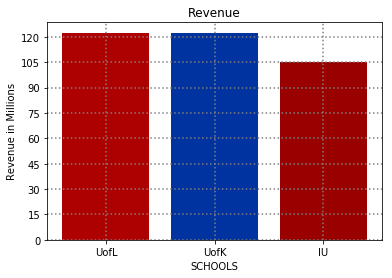

In [33]:
from pylab import *

x = ["UofL", "UofK", "IU"]
amnt = rev_abbr['abbr_total']
my_colors = [('#AD0000'), ('#0033a0'), ('#990000')]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, amnt, color=my_colors)
plt.xlabel("SCHOOLS")
plt.ylabel("Revenue in Millions")
plt.title("Revenue")

plt.plot(kind='bar', stacked=True, color=my_colors)
plt.yticks(np.arange(0, 125, 15))
plt.xticks(x_pos, x)
grid(color='grey', linestyle=':', linewidth=1.5)

plt.show()

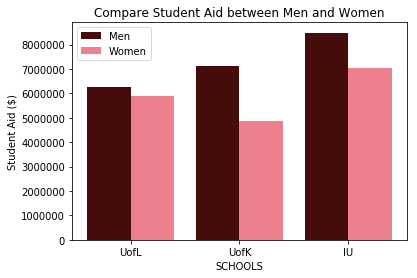

In [34]:
N = 3
mens_aid = aid['mens_team_athletic_student_aid']
womens_aid = aid['womens_team_athletic_student_aid']

#colors = [('#450C0C'), ('#ED808F')]
ind = np.arange(N)
width = 0.40
plt.bar(ind, mens_aid, width, label='Men', color=('#450C0C'))
plt.bar(ind + width, womens_aid, width, label='Women', color=('#ED808F'))

plt.ylabel('Student Aid ($)')
plt.title('Compare Student Aid between Men and Women')

plt.xticks(ind + width / 2, ('UofL', 'UofK', 'IU'))
plt.xlabel("SCHOOLS")
plt.legend(loc='best')
plt.show()

### The two following charts were just to see what the amounts would look like in pie and donut charts.

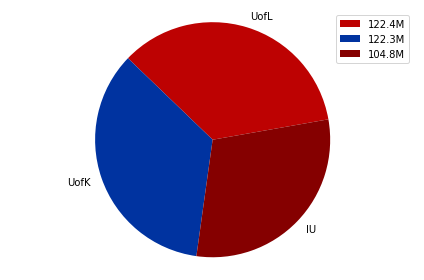

In [35]:
labels = ['UofL', 'UofK', 'IU']
sizes = revenue['grand_total_revenue']
leg_label = rev_abbr['abbr_total'].astype(str) + 'M'
colors = ['#BD0202', '#0033a0', '#850000']

fig1, ax1 = plt.subplots()

patches, texts = ax1.pie(sizes, colors = colors,
                                    labels = labels, startangle=10)


for text in texts:
    text.set_color('black')
    
ax1.axis('equal')
plt.tight_layout()
plt.legend(leg_label)
plt.show()

349,571,656

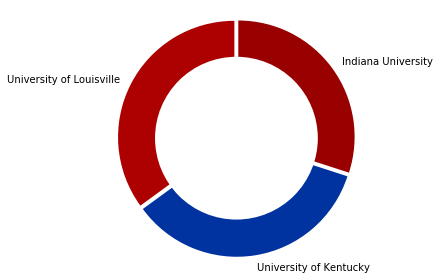

In [36]:
labels = revenue['institution_name']
sizes = revenue['grand_total_revenue']

colors = ['#AD0000', '#0033a0', '#990000']

explode = (0.02, 0.02, 0.02)

fig, ax = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, startangle=90,
        explode = explode)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()